In [124]:
#############################
#   Stock Market Analysis   #
#############################

# Im Zuge dieses Projekts möchten wir uns die Börsenzahlen von Apple, Google, Microsoft und Amazon ansehen.
# wir betrachten dabei den folgenden Zeitraum:08.02.2013 - 07.02.2018  --> also 5 Jahre.
# Ziele: # Stock Market Graphs erstellen
#        # Trade Volumes per Day visualisieren
#        # daily return berechnen
#        # Korrelationen visualisieren


In [125]:
# importieren aller wichtigen libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [126]:
# der Pfad hinter dem die individual stock-daten liegen
path = r'YOUR PATH HERE'

In [127]:
# filenames, die wir betrachten wollen
companies = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

In [128]:
# dataframe generieren, das wir befüllen wollen
all_data = pd.DataFrame()
for file in companies:
    current_df = pd.read_csv(path + '\\' + file)
    all_data=pd.concat([all_data, current_df])

In [129]:
all_data[all_data['Name'] == 'AAPL']

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [130]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [131]:
# column date zu datetime transformieren
all_data['date']=pd.to_datetime(all_data['date'])

In [132]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [133]:
tech_list = all_data['Name'].unique()

In [134]:
#liste aller tech-companies erstellen, die im df sind
tech_list

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

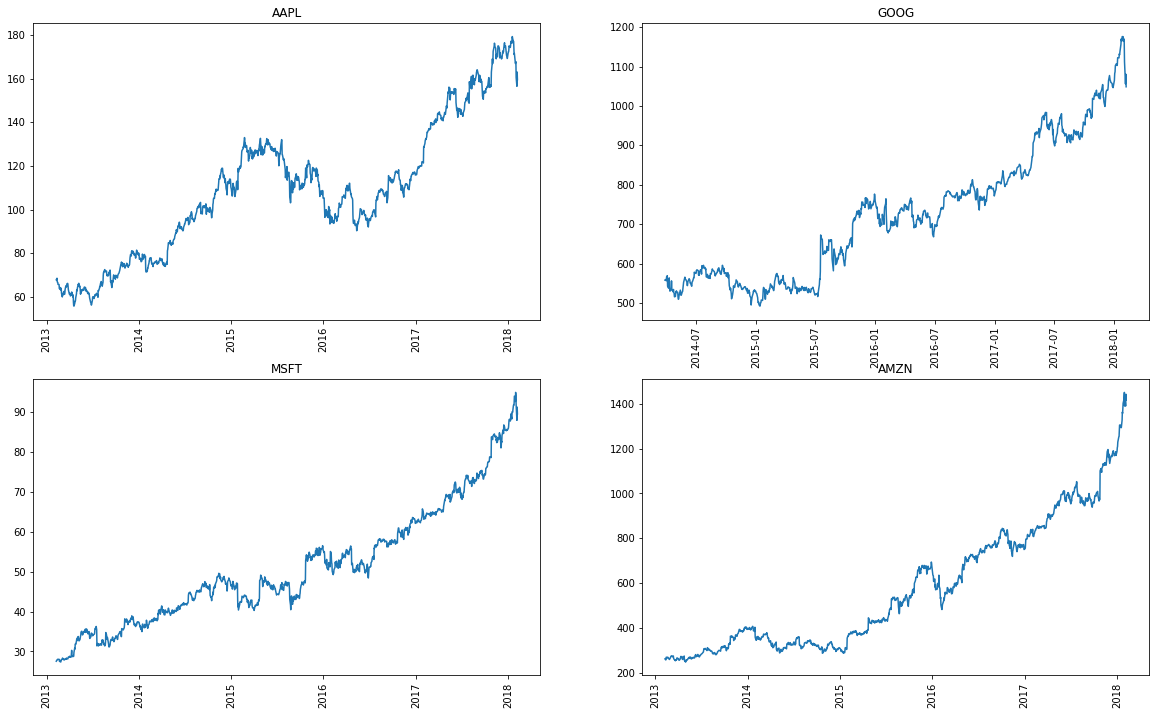

In [135]:
# nun generieren wir subplots basierend auf den 4 tech companies im lineplot-style
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list, 1):
    plt.subplot(2,2, i)
    df=all_data[all_data['Name'] == company]
    plt.xticks(rotation='vertical')
    plt.plot(df['date'], df['close'])
    plt.title(company)

In [136]:
# trade volumes je tag visualisieren 
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df, x='date', y='volume', title=company)
    fig.show()

In [137]:
# nun sehen wir uns im detail apple an und versuchen, die tägl. entwicklungen zu visualisieren.

In [138]:
apple_df = pd.read_csv(r'YOUR PATH HERE\AAPL_data.csv')
apple_df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [139]:
apple_df['daily_price_change'] = apple_df['close'] - apple_df['open']
apple_df.head()

,date,open,high,low,close,volume,Name,daily_price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [140]:
apple_df['day % return'] = (((apple_df['close'] - apple_df['open'])/apple_df['close'])*100).round(2)

In [141]:
apple_df.head()

,date,open,high,low,close,volume,Name,daily_price_change,day % return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.21
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.71
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.48
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.04
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.44


In [142]:
fig=px.line(apple_df, x='date', y='day % return', title='company')
fig.show()

In [143]:
apple_df2 = apple_df.copy()

In [144]:
apple_df2.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
daily_price_change    float64
day % return          float64
dtype: object

In [145]:
apple_df2['date'] = pd.to_datetime(apple_df2['date'])

In [146]:
apple_df2.set_index('date', inplace=True)

In [147]:
apple_df2.head()

,open,high,low,close,volume,Name,daily_price_change,day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.21
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.71
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.48
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.04
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.44


In [148]:
apple_df2['2013-02-08':'2013-02-14']

,open,high,low,close,volume,Name,daily_price_change,day % return
date,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.21
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.71
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.48
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.04
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.44


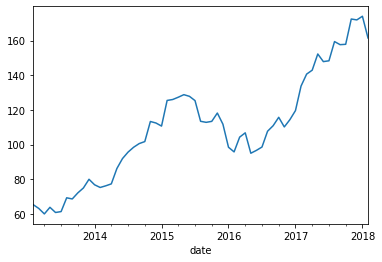

In [149]:
apple_df2['close'].resample('M').mean().plot()

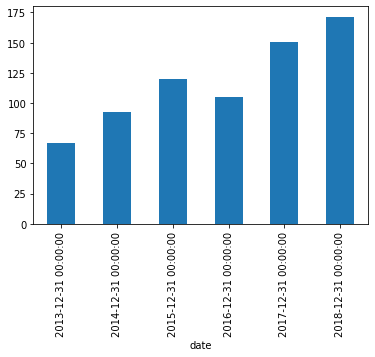

In [150]:
apple_df2['close'].resample('Y').mean().plot(kind='bar')

In [151]:
# im letzten abschnitt führen wir 4 dfs zusammen und analysieren deren zusammenhänge.

In [152]:
aapl = pd.read_csv(r'YOUR PATH HERE\individual_stocks_5yr\AAPL_data.csv')
goog = pd.read_csv(r'YOUR PATH HERE\individual_stocks_5yr\GOOG_data.csv')
msft = pd.read_csv(r'YOUR PATH HERE\individual_stocks_5yr\MSFT_data.csv')
amzn = pd.read_csv(r'YOUR PATH HERE\individual_stocks_5yr\AMZN_data.csv')

In [153]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [154]:
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [155]:
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [156]:
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [157]:
close = pd.DataFrame()
close['aapl']=aapl['close']
close['goog']=goog['close']
close['msft']=msft['close']
close['amzn']=amzn['close']
close.head()

,aapl,goog,msft,amzn
0,67.8542,558.46,27.55,261.95
1,68.5614,559.99,27.86,257.21
2,66.8428,556.97,27.88,258.70
3,66.7156,567.16,28.03,269.47
4,66.6556,567.00,28.04,269.24


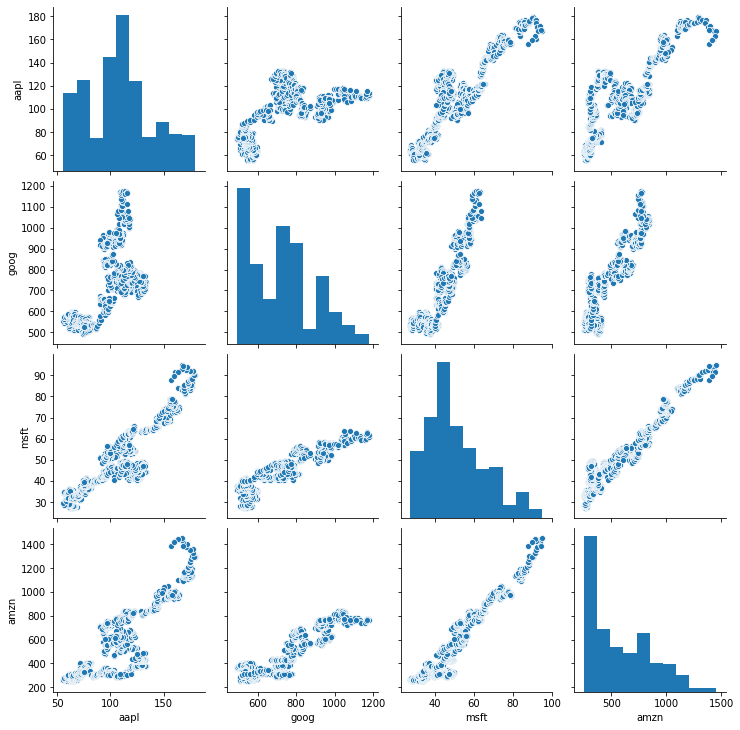

In [158]:
#mittels pairplot kann ein guter visueller Überblick über die Korrelationen gewährleistet werden. 
sns.pairplot(data=close)

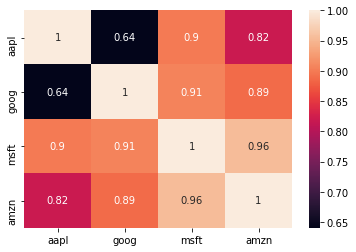

In [159]:
# auch die heatmap ist eine geläufige darstellung
sns.heatmap(data=close.corr(), annot=True)

In [160]:
# dieses dataframe beinhält die täglichen changes der verschiedenen tech companies in %
daten=pd.DataFrame()
daten['aapl_change']=((aapl['close'] - aapl['open'])/aapl['close'])*100
daten['goog_change']=((goog['close'] - goog['open'])/goog['close'])*100
daten['msft_change']=((msft['close'] - msft['open'])/msft['close'])*100
daten['amzn_change']=((amzn['close'] - amzn['open'])/amzn['close'])*100


In [161]:
daten.head()

,aapl_change,goog_change,msft_change,amzn_change
0,0.206325,-1.708269,0.725953,0.209964
1,0.714688,-0.216075,0.753769,-2.328836
2,-2.481344,-1.781065,0.000000,-0.189409
3,-0.042869,1.489879,0.356761,2.946525
4,0.443624,0.334039,0.427960,0.694548


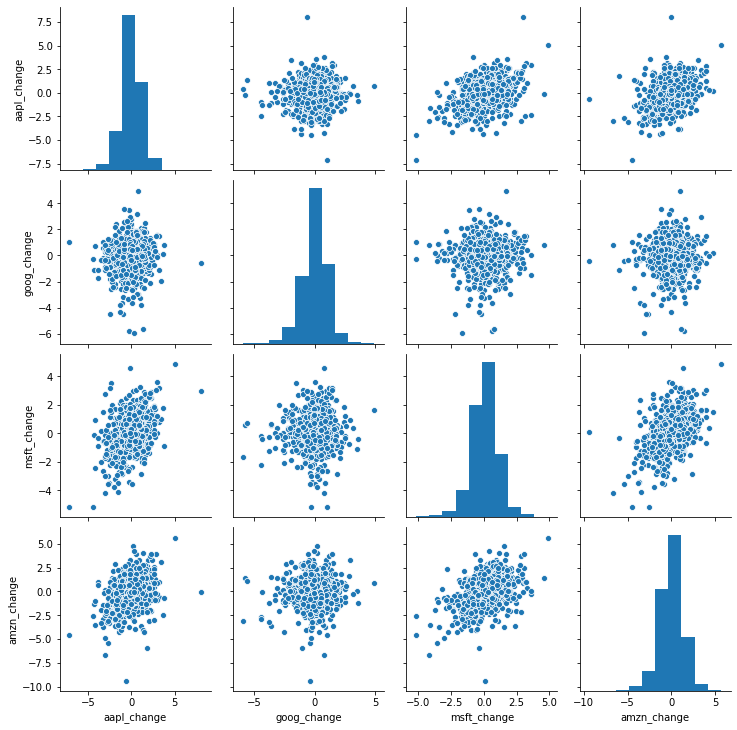

In [162]:
# aaaaand here's the matching pairplot
sns.pairplot(data=daten)

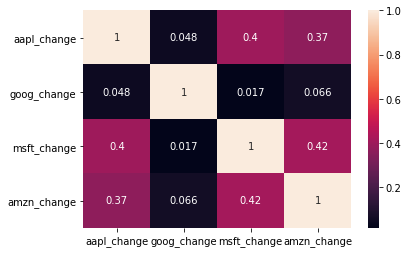

In [163]:
# as well as the heatmap, again.
sns.heatmap(daten.corr(), annot=True)

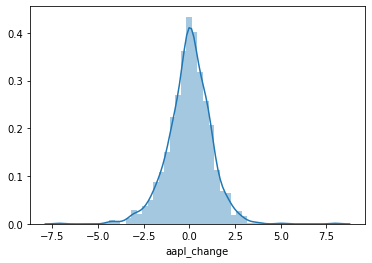

In [164]:
# mittels distplot lässt sich für die einzelnen Firmen die Verteilung darstellen
sns.distplot(daten['aapl_change'])

In [165]:
# berechnen wir uns die zugehörige Standardabweichung, so können wir sehen, dass:
daten['aapl_change'].std()  # ~60% der Daten innerhalb -1,18 und 1,18 liegen

1.1871377131421237

In [166]:
daten['aapl_change'].std()*3 #rund 99.7% der gesamten Daten zwischen -3,5 und 3,5

3.561413139426371

In [167]:
daten['aapl_change'].quantile(0.1) # in 90% der Fälle wird mein Verlust nicht höher als 1.42 % ausfallen

-1.4246644227944307

In [168]:
daten.describe() 

,aapl_change,goog_change,msft_change,amzn_change
count,1259.000000,975.000000,1259.000000,1259.000000
mean,-0.000215,-0.012495,0.076404,-0.000398
std,1.187138,1.092560,1.059260,1.358679
min,-7.104299,-5.952266,-5.177618,-9.363077
25%,-0.658021,-0.551963,-0.509241,-0.738341
50%,0.042230,0.024951,0.061069,-0.002623
75%,0.715427,0.672649,0.703264,0.852568
max,8.000388,4.943550,4.861491,5.640265
